In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
df=pd.read_csv('Components_of_Fertilizer.csv')

In [11]:
df.drop('Proline',axis=1,inplace=True)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93


In [12]:
data=df.values
data

array([[14.23,  1.71,  2.43, ...,  5.64,  1.04,  3.92],
       [13.2 ,  1.78,  2.14, ...,  4.38,  1.05,  3.4 ],
       [13.16,  2.36,  2.67, ...,  5.68,  1.03,  3.17],
       ...,
       [12.82,  3.37,  2.3 , ..., 10.26,  0.72,  1.75],
       [13.58,  2.58,  2.69, ...,  8.66,  0.74,  1.8 ],
       [13.4 ,  4.6 ,  2.86, ...,  8.5 ,  0.67,  1.92]])

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


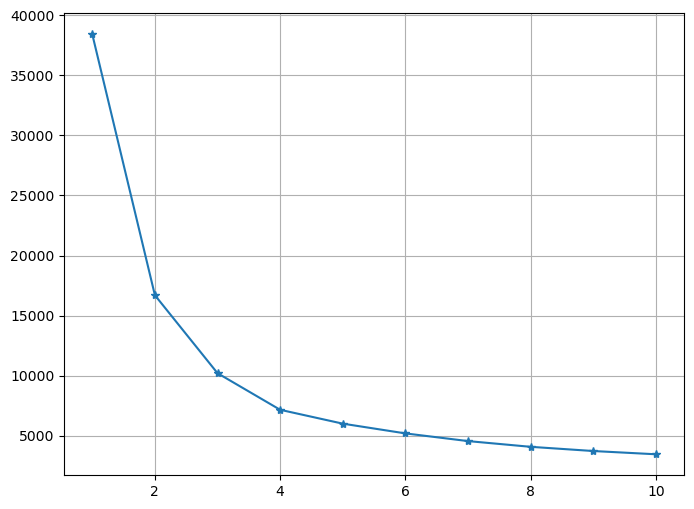

In [44]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='*')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
k=3
kmeans=KMeans(n_clusters=k,init='k-means++')
y_kmeans=kmeans.fit_predict(df)


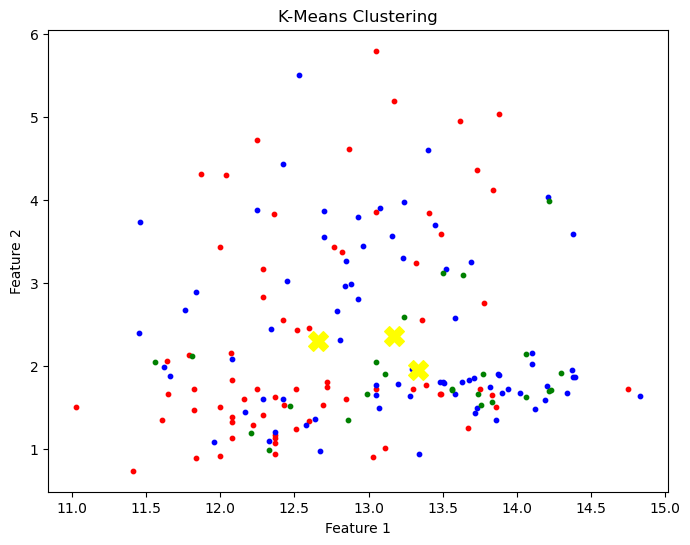

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(data[y_kmeans == 0,0],data[y_kmeans == 0,1],s=10,c='red')
plt.scatter(data[y_kmeans == 1,0],data[y_kmeans == 1,1],s=10,c='blue')
plt.scatter(data[y_kmeans == 2,0],data[y_kmeans == 2,1],s=10,c='green')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', marker='X')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [41]:
processed_df=pd.DataFrame(data)
processed_df.to_csv("Preprocessed_Components_of_Fertilizer1.csv", index=False)